# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [20]:
df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [4]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias: Todas as Categorias estão ou abaixo ou acima da mediana

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [12]:
#Seu código aqui
# df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)
df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median', 'std']).sort_values(by='std', ascending=False)

,mean,median,std
Categoria,,,
lacteos,2385.219239,989.0,3925.816164
belleza-y-cuidado-personal,1783.556485,1569.0,2210.041719
congelados,2108.042553,1519.0,2111.539896
comidas-preparadas,3095.043478,3290.0,2019.911428
frutas,1724.473684,1195.0,1639.151114
instantaneos-y-sopas,765.491228,439.0,1170.232869
verduras,1343.296875,1180.0,1012.699625


Digite nesse campo o comportamento que você identificou.

As categorias com maiores desvios e seus comportamentos foram:

1 - lacteos: A média é MUITO maior que a mediana.

2 - beleza-y-cuidado-personal: A média ainda é um pouco maior que a mediana.

3 - congelados: Diferença considerável entre média e mediana, mas não tão grande quanto em "lacteos".

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

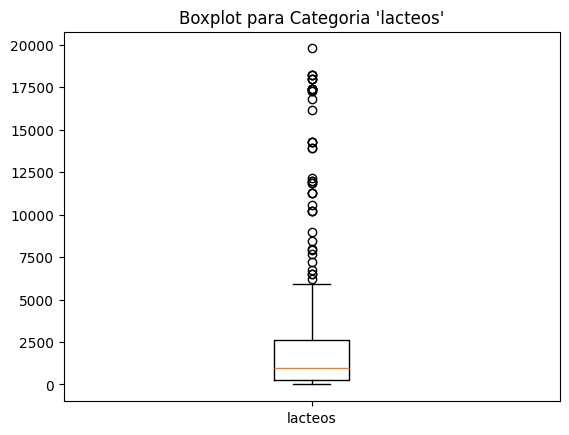

In [29]:
df_filtrado = df[df['Categoria'] == 'lacteos']

plt.boxplot(df_filtrado['Preco_Normal'])

# Adicionando título
plt.title("Boxplot para Categoria 'lacteos'")
plt.xticks([1], ['lacteos'])  # Adiciona o nome da categoria

plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

<ipython-input-25-a5c59f5ecd43>:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



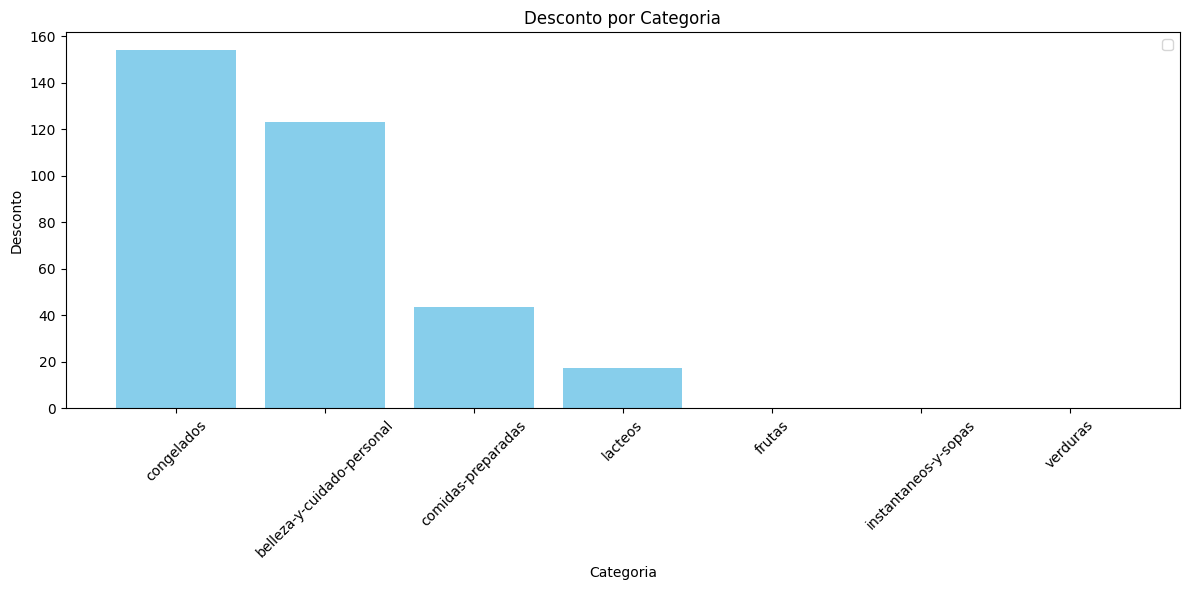

In [25]:
# Agrupando por Desconto
desconto_medio = df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=False)

plt.figure(figsize=(12, 6))

plt.bar(desconto_medio['Categoria'], desconto_medio['Desconto'], color='skyblue')

plt.title('Desconto por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Desconto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [24]:
desconto_marca = df.groupby('Marca')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=False)

fig = px.bar(
    desconto_marca,
    x='Marca',
    y='Desconto',
    color='Marca',
    title='Desconto Médio por Marca',
    height=600
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()